In [73]:
!pip install descartes
!pip install plotly
!pip install geopandas
!pip install shapely
!pip install geoplot

  Using cached https://files.pythonhosted.org/packages/72/c2/da48334c5c762ea86f881bdf49a61ad44f87eb2cb36acb5e4262f70d40ef/geoplot-0.2.4.tar.gz
  Using cached https://files.pythonhosted.org/packages/e5/92/fe8838fa8158931906dfc4f16c5c1436b3dd2daf83592645b179581403ad/Cartopy-0.17.0.tar.gz
  Installing build dependencies ... done
    Complete output from command python setup.py egg_info:
    /private/var/folders/rf/nfrz6wds09b1khrjt91h6j1c0000gn/T/pip-install-9lxmwbln/cartopy/setup.py:171: UserWarning: Unable to determine GEOS version. Ensure you have 3.3.3 or later installed, or installation may fail.
      '.'.join(str(v) for v in GEOS_MIN_VERSION), ))
    Proj 4.9.0 must be installed.
    
    ----------------------------------------
Command "python setup.py egg_info" failed with error code 1 in /private/var/folders/rf/nfrz6wds09b1khrjt91h6j1c0000gn/T/pip-install-9lxmwbln/cartopy/


In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from shapely.geometry import LineString
from descartes import PolygonPatch
import plotly.tools as tls

%config InlineBackend.figure_format = 'svg'


In [2]:
file ="Output/cleaned_BMI_data.csv"
bmi_df = pd.read_csv(file)
bmi_df = bmi_df.rename(columns={"Entity":"name"})

bmi_df

,name,Code,Year,Men Overweight or Obese (%),Men (BMI),Women overweight or obese (%),Women (BMI),Daily caloric supply (per person) (kcal/person/day),Total population (Gapminder),HIV/AIDS and tuberculosis (DALYs),...,"Diabetes, blood, & endocrine diseases (DALYs)",Musculoskeletal disorders (DALYs),Other NCDs (DALYs),Transport injuries (DALYs),Natural disasters (DALYs),Conflict and terrorism (DALYs),Self-harm (DALYs),Interpersonal violence (DALYs),Unintentional injuries (DALYs),% Adults > 25BMI
0,Afghanistan,AFG,2013,12.9,21.508647,19.5,23.549702,2090.0,34499915.0,5.591597e+05,...,8.478216e+05,3.801932e+05,1.557879e+06,8.382824e+05,12059.273418,718251.148272,1.031573e+05,3.283805e+05,8.521126e+05,18.1
1,Albania,ALB,2013,57.5,26.464979,45.1,25.699533,3193.0,3238316.0,4.101706e+02,...,3.416235e+04,6.870338e+04,7.869836e+04,1.937305e+04,71.336918,632.094734,8.639025e+03,4.715489e+03,4.346144e+04,56.5
2,Algeria,DZA,2013,50.7,24.218087,60.8,25.938751,3296.0,36983924.0,3.740567e+04,...,7.372414e+05,7.745973e+05,1.390776e+06,5.224257e+05,856.790841,16455.239089,6.767042e+04,3.630610e+04,4.033538e+05,57.2
3,Angola,AGO,2013,18.0,22.696896,33.8,23.982417,2473.0,20714494.0,1.166419e+06,...,2.952892e+05,2.266698e+05,8.028842e+05,3.985924e+05,55.153257,14276.062397,4.988315e+04,7.320029e+04,6.135334e+05,22.1
4,Antigua and Barbuda,ATG,2013,52.3,27.080538,65.2,29.029067,2417.0,91404.0,4.030682e+02,...,2.441532e+03,1.569298e+03,2.122472e+03,4.539490e+02,0.000000,0.096284,9.635187e+01,2.807071e+02,1.196329e+03,46.4
5,Argentina,ARG,2013,66.0,27.488960,59.2,27.148180,3229.0,41473982.0,1.101580e+05,...,7.323343e+05,1.098302e+06,1.120459e+06,3.670367e+05,3090.082769,1030.077389,2.253975e+05,1.524749e+05,5.183644e+05,61.6
6,Armenia,ARM,2013,53.9,25.779199,52.7,27.327950,2928.0,3117722.0,4.841128e+03,...,6.866397e+04,6.083915e+04,8.646543e+04,1.719929e+04,3697.265346,412.477081,9.963310e+03,6.784736e+03,4.515981e+04,53.3
7,Australia,AUS,2013,69.0,27.453310,57.0,26.722351,3276.0,23213944.0,6.895641e+03,...,2.718569e+05,6.859014e+05,5.229942e+05,1.187323e+05,41.193732,0.000000,1.151824e+05,2.209624e+04,2.009343e+05,65.5
8,Austria,AUT,2013,62.0,26.550396,46.8,24.476085,3768.0,8441263.0,4.970819e+03,...,1.452866e+05,2.303925e+05,2.179333e+05,4.052257e+04,876.116705,0.000000,4.877023e+04,5.738684e+03,1.079846e+05,56.6
9,Azerbaijan,AZE,2013,54.1,26.254596,56.5,27.824629,3118.0,9533445.0,3.416648e+04,...,1.780918e+05,1.613908e+05,2.620577e+05,5.169878e+04,42.819763,2880.648086,1.991988e+04,2.445550e+04,1.686520e+05,50.6


In [25]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merge_table = pd.merge(world, bmi_df, on="name")
merge_table.columns

World_Overweight_average = merge_table['% Adults > 25BMI'].mean()
World_Calorie_average = merge_table['Daily caloric supply (per person) (kcal/person/day)'].mean()

print(World_Overweight_average)
print(World_Calorie_average)

US = merge_table.loc[merge_table["name"] == "United States", :]
US['% Adults > 25BMI']
US['Daily caloric supply (per person) (kcal/person/day)']
# world.count()


46.12183098591549
2873.347222222222


136    3682.0
Name: Daily caloric supply (per person) (kcal/person/day), dtype: float64

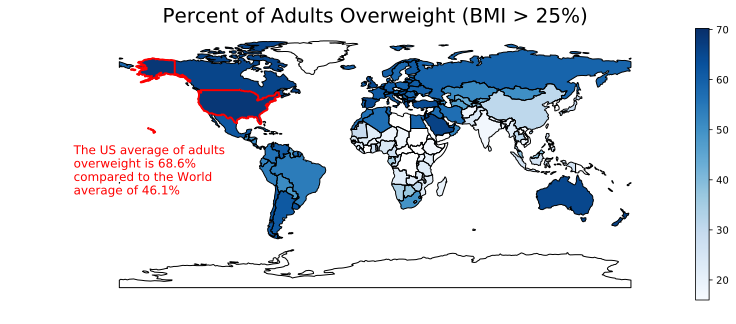

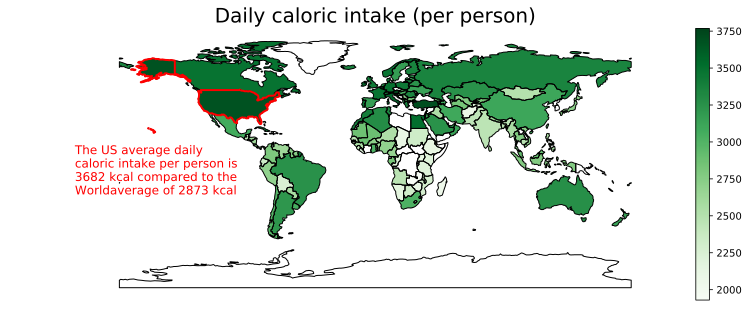

In [36]:
figsize = (14, 5)
title = "Percent of Adults Overweight (BMI > 25%)"
description1 = '''
The US average of adults\noverweight is 68.6%\ncompared to the World\naverage of 46.1%'''.strip()
description2 = '''
The US average daily\ncaloric intake per person is\n3682 kcal compared to the\nWorldaverage of 2873 kcal'''.strip()
merge_table["% Adults > 25BMI"].dtype

healthiest = merge_table.dropna().sort_values('% Adults > 25BMI', ascending=False).head(164)
healthiest.head(164)
heartdisease = merge_table.loc[:, ["name", "geometry", "Cardiovascular diseases (DALYs)"]]
heartdisease = heartdisease.dropna().sort_values('Cardiovascular diseases (DALYs)', ascending=False).head(164)
heartdisease.head(164)

diabetes = merge_table.loc[:, ["name", "geometry", "Diabetes, blood, & endocrine diseases (DALYs)"]]
diabetes = diabetes.dropna().sort_values('Diabetes, blood, & endocrine diseases (DALYs)', ascending=False).head(164)
diabetes.head(164)

calories = merge_table.loc[:, ["name", "geometry", "Daily caloric supply (per person) (kcal/person/day)"]]
calories = calories.dropna().sort_values('Daily caloric supply (per person) (kcal/person/day)', ascending=False).head(164)
calories.head(164)


fig, ax = plt.subplots(figsize=figsize) 
healthiest.plot(column = '% Adults > 25BMI',cmap='Blues',ax=ax,legend=True)

world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=1,ax=ax) #Use your second dataframe
US.geometry.boundary.plot(color=None,edgecolor='r',linewidth=2,ax=ax) #Use your second dataframe

ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.annotate(description1, xy=(0.1, 0.4), color='red', size=12, xycoords='figure fraction')
ax.set_axis_off()

plt.savefig("Output/percent_overweight_world_map.png")



fig, ax = plt.subplots(figsize=figsize) 
calories.plot(column = 'Daily caloric supply (per person) (kcal/person/day)',cmap='Greens',ax=ax,alpha=1,legend=True)


world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=1,ax=ax) #Use your second dataframe
US.geometry.boundary.plot(color=None,edgecolor='r',linewidth=2,ax=ax) #Use your second dataframe

ax.set_title("Daily caloric intake (per person)", fontdict={'fontsize': 20}, loc='center')
ax.annotate(description2, color='red', xy=(0.1, 0.4), size=12, xycoords='figure fraction')
ax.set_axis_off()

plt.savefig("Output/daily_calories_world_map.png")






